In [1]:
from keras.datasets import cifar10
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_test = np_utils.to_categorical(Y_test, classes)

input_size = 3072
batch_size = 100
epocs = 100


In [3]:
model = Sequential([
    Dense(1024, input_dim=input_size),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(512),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')
])

W0923 20:34:13.629676 140401967470400 deprecation_wrapper.py:119] From /home/cris/anaconda3/envs/envIA/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0923 20:34:13.704031 140401967470400 deprecation_wrapper.py:119] From /home/cris/anaconda3/envs/envIA/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0923 20:34:13.710969 140401967470400 deprecation_wrapper.py:119] From /home/cris/anaconda3/envs/envIA/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [4]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epocs, verbose=1)

W0923 20:34:13.921058 140401967470400 deprecation_wrapper.py:119] From /home/cris/anaconda3/envs/envIA/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0923 20:34:13.986781 140401967470400 deprecation_wrapper.py:119] From /home/cris/anaconda3/envs/envIA/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0923 20:34:14.285238 140401967470400 deprecation.py:323] From /home/cris/anaconda3/envs/envIA/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0923 20:34:14.603628 140401967470400 deprecation_wrapper.py:119] From /home/cris/anaconda3/envs/envIA/lib/python3.7/site-pa

Epoch 1/100
50000/50000 [==============================] - 77s 2ms/step - loss: 2.1960 - acc: 0.1758
Epoch 2/100
50000/50000 [==============================] - 77s 2ms/step - loss: 2.0574 - acc: 0.2343
Epoch 3/100
50000/50000 [==============================] - 72s 1ms/step - loss: 1.9966 - acc: 0.2627
Epoch 4/100
50000/50000 [==============================] - 71s 1ms/step - loss: 1.9532 - acc: 0.2859
Epoch 5/100
50000/50000 [==============================] - 69s 1ms/step - loss: 1.9243 - acc: 0.3020
Epoch 6/100
50000/50000 [==============================] - 69s 1ms/step - loss: 1.8979 - acc: 0.3110
Epoch 7/100
50000/50000 [==============================] - 68s 1ms/step - loss: 1.8745 - acc: 0.3194
Epoch 8/100
50000/50000 [==============================] - 70s 1ms/step - loss: 1.8455 - acc: 0.3322
Epoch 9/100
50000/50000 [==============================] - 69s 1ms/step - loss: 1.8263 - acc: 0.3372
Epoch 10/100
50000/50000 [==============================] - 69s 1ms/step - loss: 1.8119 - a

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import numpy
import random

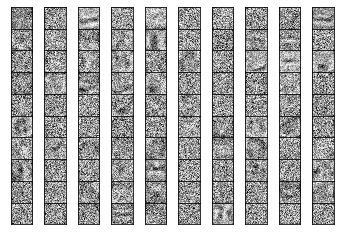

In [6]:
fig = plt.figure()
outer_grid = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)

weights = model.layers[0].get_weights()
w = weights[0].T

for i, neuron in enumerate(random.sample(range(0, 1023), 100)):
    ax = plt.Subplot(fig, outer_grid[i])
    ax.imshow(numpy.mean(numpy.reshape(w[i], (32, 32, 3)), axis=2), cmap=cm.Greys_r)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)
plt.show()

              

In [7]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy', score[1])

10000/10000 [==============================] - 4s 430us/step
Test accuracy 0.4383
